<a href="https://colab.research.google.com/github/goulartsursula/DisciplinasUERJ/blob/master/EspectroscopiaEmissoesGama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Espectroscopia de Emissões Gama

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

| Isótopo | Meia-vida | Picos de emissão $\gamma$ de interesse |
| :-----: | :-------: | :------------------------------------: |
| Cs-137  | 30,2 anos | 662 keV                                |
| Co-60   | 5,27 anos | 1173/ 1333 keV                        |
| Na-22   | 2,60 anos | 511/ 1275 keV                         |

##1. Sódio 22

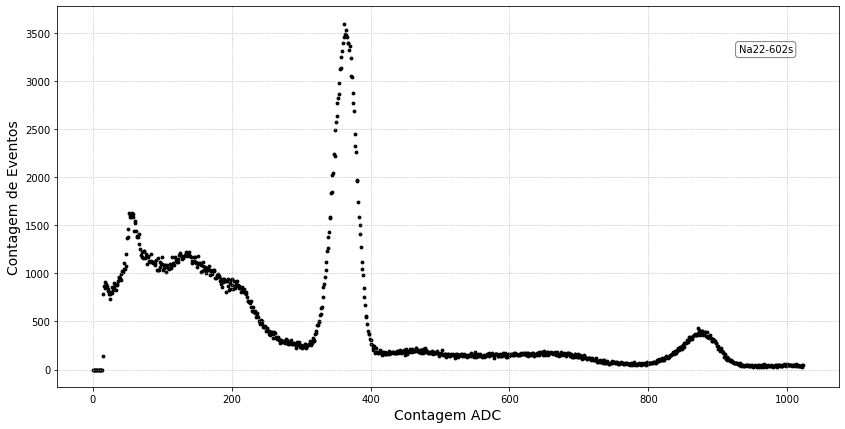

In [2]:
dataNa22 = pd.read_table('http://dfnae.fis.uerj.br/twiki/pub/DFNAE/EstruturaII/Na22-602s.tsv', skiprows=21)
dataNa22[['Channel', 'Counts']]

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(dataNa22['Channel'], dataNa22['Counts'], s=8, color='black')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(930, 3300, 'Na22-602s', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.grid(linestyle='dotted')

###1.1. Gráficos seção de área do Sódio 22

Para que os gráficos abaixo fossem feitos, pegamos pontos ao redor dos picos de modo que não fosse considerado a calda, afinal caso isso tivesse sido feito teriamos que escrever duas gaussianas para cada pico.

In [3]:
print(dataNa22.loc[350:380].nlargest(3, 'Counts'),'\n')
print(dataNa22.loc[350:380]['Counts'].idxmax(),'\n')
peak1Na22 = dataNa22.iloc[dataNa22.loc[350:380]['Counts'].idxmax()]['Channel']

print(dataNa22.loc[860:880].nlargest(3, 'Counts'),'\n')
print(dataNa22.loc[860:880]['Counts'].idxmax())
peak2Na22 = dataNa22.iloc[dataNa22.loc[860:880]['Counts'].idxmax()]['Channel']

     Channel  Energy  Counts
362      362     NaN    3602
364      364     NaN    3536
363      363     NaN    3497 

362 

     Channel  Energy  Counts
871      871     NaN     431
873      873     NaN     410
878      878     NaN     400 

871


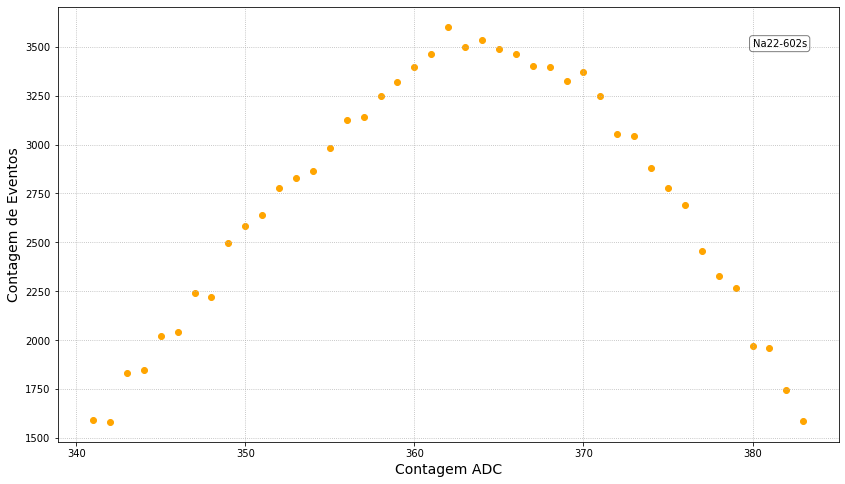

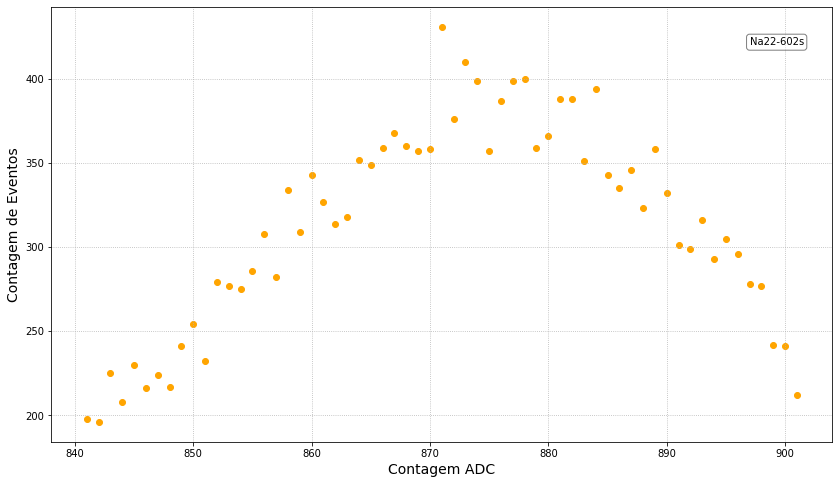

In [4]:
#First peak Na22
xdata1Na22 = dataNa22.loc[peak1Na22 - 21:peak1Na22 + 21]['Channel']
ydata1Na22 = dataNa22.loc[peak1Na22- 21:peak1Na22 + 21]['Counts']

fig, ax = plt.subplots(figsize=(14, 8))
plt.scatter(xdata1Na22, ydata1Na22, c='orange')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(380, 3500, 'Na22-602s', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.grid(linestyle='dotted')

#Second peak Na22
xdata2Na22 = dataNa22.loc[peak2Na22 - 30:peak2Na22 + 30]['Channel']
ydata2Na22 = dataNa22.loc[peak2Na22 - 30:peak2Na22 + 30]['Counts']

fig, ax = plt.subplots(figsize=(14, 8))
plt.scatter(xdata2Na22, ydata2Na22, c='orange')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(897, 420, 'Na22-602s', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.grid(linestyle='dotted')

###1.2. Calibração Sódio 22

In [5]:
def Gauss1Na22(x, A, mean, sigma): #Gaussiana para o primeiro pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(ydata1Na22)
p0 = (1000, 362, 45) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

popt1Na22, pcov1Na22 = curve_fit(Gauss1Na22, xdata1Na22, ydata1Na22, sigma=sigma, p0=p0) #print A, mean, sigma

error1Na22 = [np.sqrt(pcov1Na22[i, i]) for i in np.arange(3)] #Diagonal principal da matriz

In [43]:
popt1Na22

array([3489.7904241 ,  363.08037375,   16.75608235])

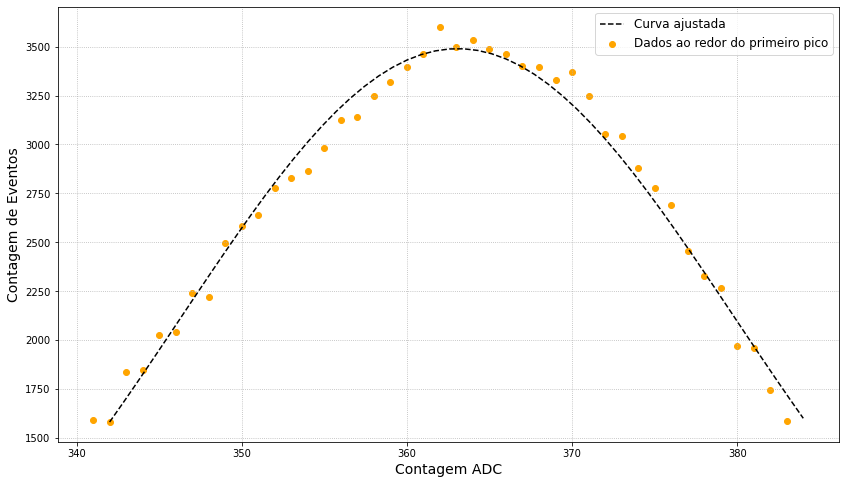

In [65]:
fig = plt.subplots(figsize=(14,8))

x_na1 = np.linspace(342,384)
plt.plot(x_na1, Gauss1Na22(x_na1, *popt1Na22), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(xdata1Na22, ydata1Na22, c='orange', label='Dados ao redor do primeiro pico')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='12')
plt.grid(linestyle='dotted')

In [36]:
def Gauss2Na22(x, A, mean, sigma): #Gaussiana para o segundo pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(ydata2Na22)
p0 = (1000, 871, 60) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

popt2Na22, pcov2Na22 = curve_fit(Gauss2Na22, xdata2Na22, ydata2Na22, sigma=sigma, p0=p0)

error2Na22 = [np.sqrt(pcov2Na22[i, i]) for i in np.arange(3)]

In [42]:
popt2Na22

array([379.25400726, 874.74327443,  27.50269429])

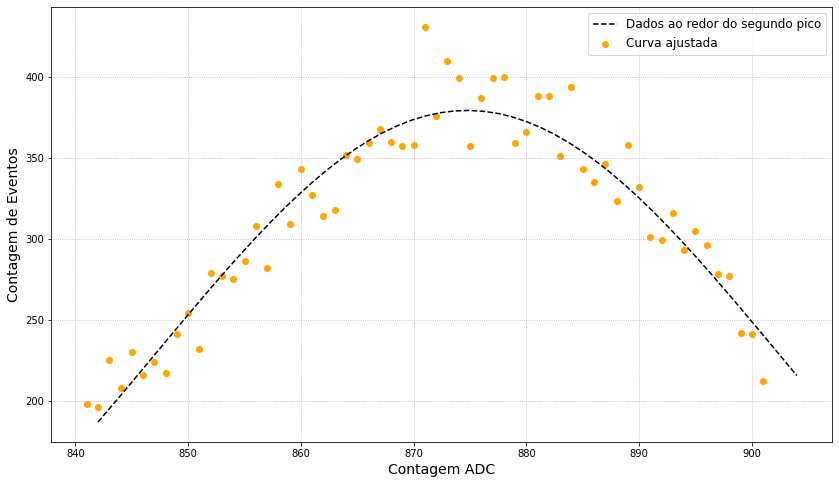

In [64]:
fig = plt.subplots(figsize=(14, 8))

x_na2 = np.linspace(842, 904)
plt.plot(x_na2, Gauss2Na22(x_na2, *popt2Na22), linestyle='--', c='black', label='Dados ao redor do segundo pico')
plt.scatter(xdata2Na22, ydata2Na22, c='orange', label='Curva ajustada')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='12')
plt.grid(linestyle='dotted')

##2. Césio 137

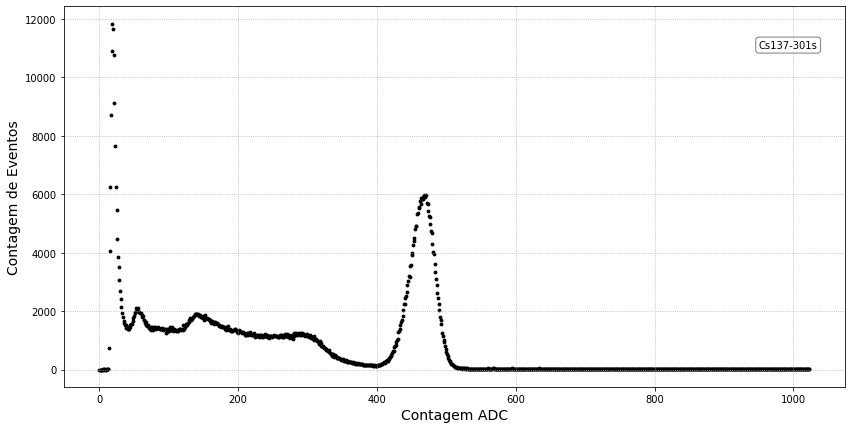

In [12]:
dataCs137 = pd.read_table('http://dfnae.fis.uerj.br/twiki/pub/DFNAE/EstruturaII/Cs137-301s.tsv', skiprows=21)
dataCs137[['Channel', 'Counts']]

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(dataCs137['Channel'], dataCs137['Counts'], s=8, color='black')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(950, 11000, 'Cs137-301s', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.grid(linestyle='dotted')

###2.1. Gráficos seção de área do Césio 137
Para que o gráfico abaixo fosse feito, pegamos pontos ao redor do pico de modo que não fosse considerado a calda, afinal caso isso tivesse sido feito teriamos que escrever duas gaussianas para o pico.

In [13]:
print(dataCs137.loc[450:500].nlargest(3, 'Counts'),'\n')
print(dataCs137.loc[450:500]['Counts'].idxmax(),'\n')
peak1Cs137 = dataCs137.iloc[dataCs137.loc[450:500]['Counts'].idxmax()]['Channel']

     Channel  Energy  Counts
468      468     NaN    5987
471      471     NaN    5961
469      469     NaN    5951 

468 



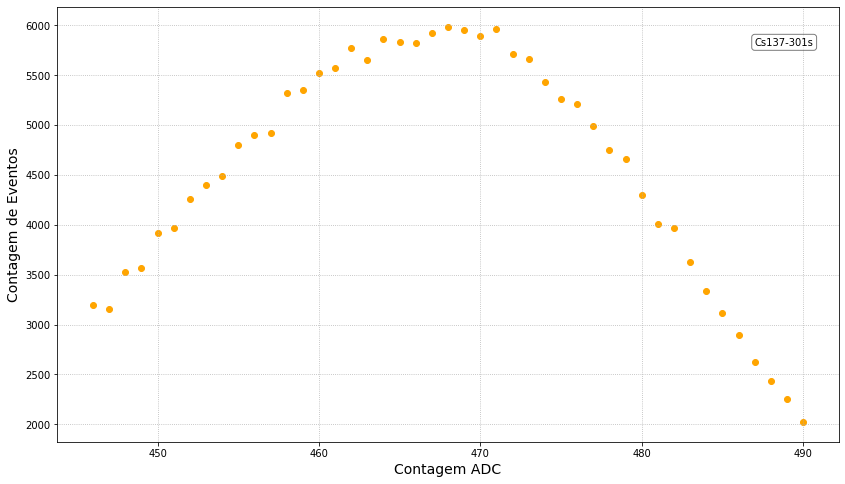

In [14]:
xdataCs137 = dataCs137.loc[peak1Cs137 - 22:peak1Cs137 + 22]['Channel']
ydataCs137 = dataCs137.loc[peak1Cs137- 22:peak1Cs137 + 22]['Counts']

fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(xdataCs137, ydataCs137, c='orange')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(487, 5800, 'Cs137-301s', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.grid(linestyle='dotted')

###2.2. Calibração Césio 137

In [15]:
def GaussCs137(x, A, mean, sigma): #Gaussiana para o primeiro pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(ydataCs137)
p0 = (1000, 468, 45) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

poptCs137, pcovCs137 = curve_fit(GaussCs137, xdataCs137, ydataCs137, sigma=sigma, p0=p0) #print A, mean, sigma

errorCs137 = [np.sqrt(pcovCs137[i, i]) for i in np.arange(3)] 

In [16]:
poptCs137

array([5985.42299466,  466.06341864,   16.76267054])

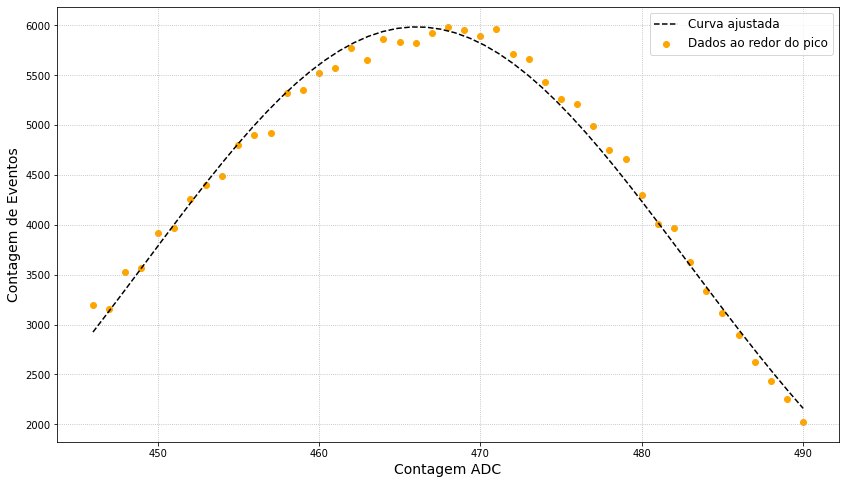

In [66]:
fig = plt.subplots(figsize=(14,8))
x_cs = np.linspace(446, 490)
plt.plot(x_cs, GaussCs137(x_cs, *poptCs137), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(xdataCs137, ydataCs137, c='orange', label='Dados ao redor do pico')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='12')
plt.grid(linestyle='dotted')

##3. Cobalto 60

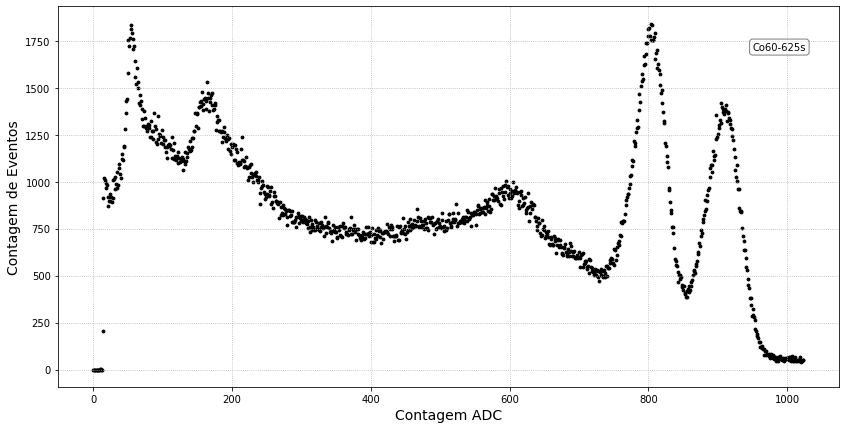

In [18]:
dataCo60 = pd.read_table('http://dfnae.fis.uerj.br/twiki/pub/DFNAE/EstruturaII/Co60-625s.tsv', skiprows=21)
dataCo60[['Channel', 'Counts']]

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(dataCo60['Channel'], dataCo60['Counts'], s=8, color='black')
plt.xlabel('Contagem ADC', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(950, 1700, 'Co60-625s', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.grid(linestyle='dotted')

###3.1 Reta ajustada *Na22* e *Cs137*

Reta ajustada usando os valores obtidos através do ajuste gaussiano: *mean* e *sigma*.

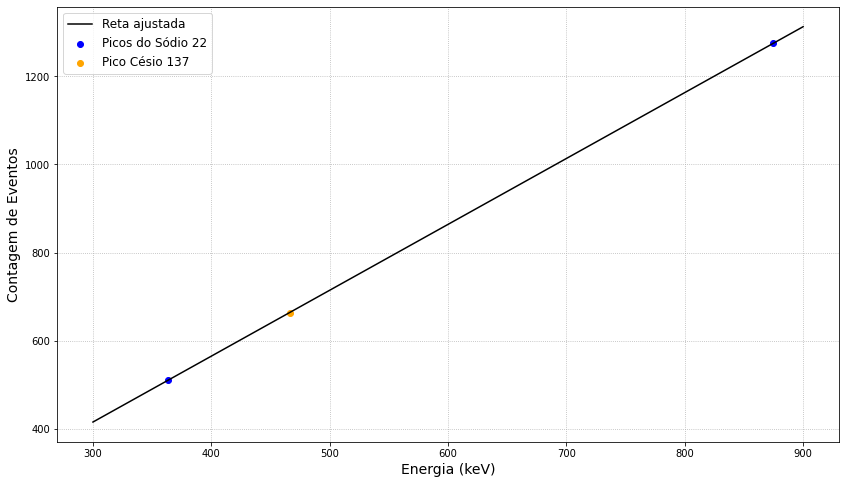

In [19]:
means = [popt1Na22[1], popt2Na22[1], poptCs137[1]]
sigmas = [popt1Na22[2], popt2Na22[2], poptCs137[2]]
energy = [511, 1275, 662] #Energia de referência

coef, covar = np.polyfit(means, energy, 1, cov=True)

fig = plt.subplots(figsize=(14,8))
x_reta = np.linspace(300, 900)
plt.scatter((popt1Na22[1], popt2Na22[1]), (energy[0], energy[1]), color='b', label='Picos do Sódio 22')
plt.scatter(poptCs137[1], energy[2], color='orange', label='Pico Césio 137')
plt.plot(x_reta, coef[0]*x_reta + coef[1], color='black', label='Reta ajustada')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='12')
plt.grid(linestyle='dotted')

##4. Gráfico da energia

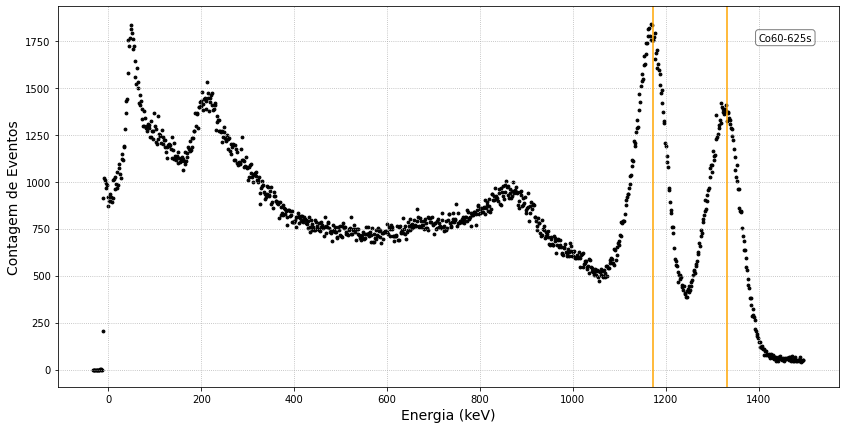

In [61]:
dataCo60 = pd.read_table('http://dfnae.fis.uerj.br/twiki/pub/DFNAE/EstruturaII/Co60-625s.tsv', skiprows=21)
dataCo60['Energy'] = coef[0]*dataCo60['Channel'] + coef[1]

fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(dataCo60['Energy'], dataCo60['Counts'], s=8, color='black')
plt.axvline(x=1173, ymin=0, ymax=1, color='orange')
plt.axvline(x=1333, ymin=0, ymax=1, color='orange')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(1400, 1750, 'Co60-625s', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.grid(linestyle='dotted')

###Gráficos seção de área Cobalto 60 + Calibração



*   ~Falta fazer cortes nas seções~

Ao fazer a gaussiana para os dois picos, obtemos o pico da gaussiana, ou seja, o pico de energia. O objetivo é compará-lo com o valor de referência.

Por fim, é necessário explicar os decaimentos vistos no gráfico.



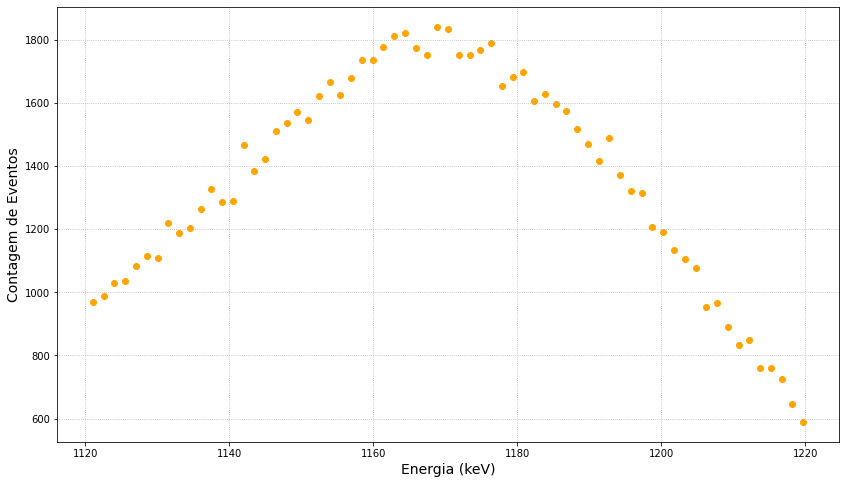

In [60]:
dataCo60_peak_1 = dataCo60[(dataCo60['Energy']>=1120)&(dataCo60['Energy']<=1220)]

fig = plt.subplots(figsize=(14,8))
plt.scatter(dataCo60_peak_1['Energy'], dataCo60_peak_1['Counts'], c='orange')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.grid(linestyle='dotted')

In [22]:
def Gauss1Co60(x, A, mean, sigma): #Gaussiana para o primeiro pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(dataCo60_peak_1['Energy'])
p0 = (1000, 1170, 100) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

popt1Co60, pcov1Co60 = curve_fit(Gauss1Co60, dataCo60_peak_1['Energy'], dataCo60_peak_1['Counts'], sigma=sigma, p0=p0) #print A, mean, sigma

error1Co60 = [np.sqrt(pcov1Co60[i, i]) for i in np.arange(3)] 

In [67]:
popt1Co60

array([1774.94184064, 1166.48444844,  -37.7232774 ])

In [69]:
error1Co60

[10.160343490765447, 0.2735112263309646, 0.39470883103298116]

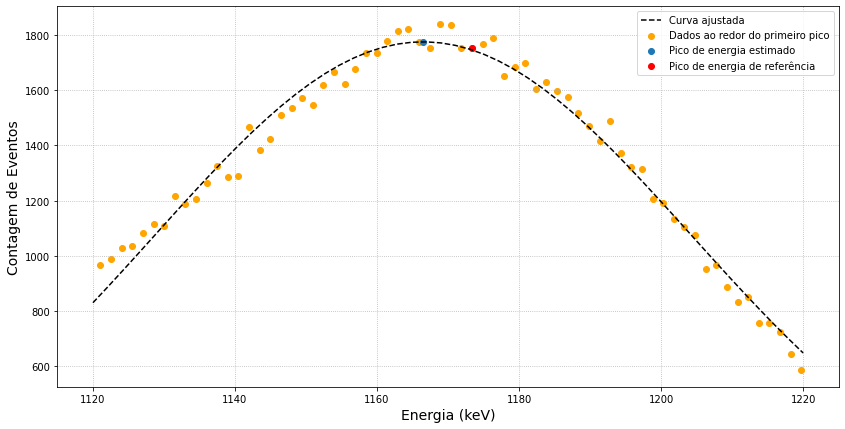

In [23]:
fig = plt.subplots(figsize=(14,7))
x1_co = np.linspace(1120, 1220)
plt.plot(x1_co, Gauss1Co60(x1_co, *popt1Co60), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(dataCo60_peak_1['Energy'], dataCo60_peak_1['Counts'], c='orange', label='Dados ao redor do primeiro pico')
plt.scatter(popt1Co60[1],popt1Co60[0], label='Pico de energia estimado')
plt.scatter(1173.385256, 1751, c='r', label='Pico de energia de referência')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='10')
plt.grid(linestyle='dotted')

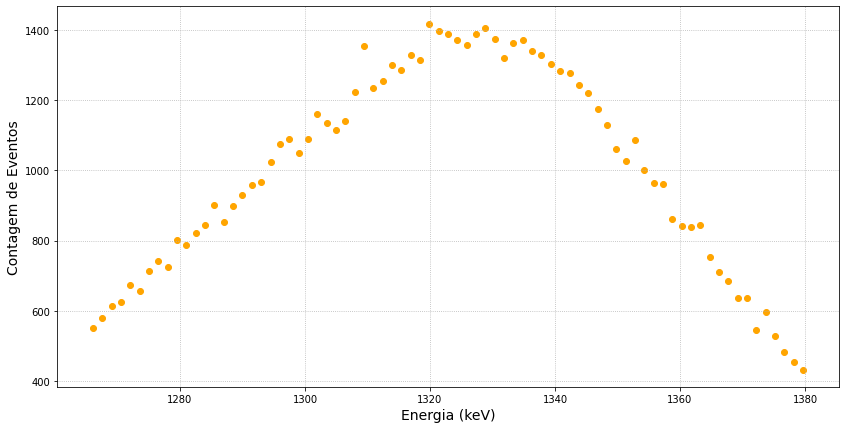

In [24]:
dataCo60_peak_2 = dataCo60[(dataCo60['Energy']>=1265)&(dataCo60['Energy']<=1380)]

fig = plt.subplots(figsize=(14,7))
plt.scatter(dataCo60_peak_2['Energy'], dataCo60_peak_2['Counts'], c='orange')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.grid(linestyle='dotted')

In [25]:
def Gauss2Co60(x, A, mean, sigma): #Gaussiana para segundo pico
    return A * np.exp(-0.5 * np.square((x - mean) / sigma))

sigma = np.sqrt(dataCo60_peak_2['Energy'])
p0 = (1000, 1330, 110) #Condições iniciais: valor máximo de y, estimativa da média, xmax - xmin

popt2Co60, pcov2Co60 = curve_fit(Gauss2Co60, dataCo60_peak_2['Energy'], dataCo60_peak_2['Counts'], sigma=sigma, p0=p0) #print A, mean, sigma

error2Co60 = [np.sqrt(pcov2Co60[i, i]) for i in np.arange(3)] 

In [68]:
popt2Co60

array([1363.83673358, 1323.01477754,   39.50017587])

In [70]:
error2Co60

[9.858862624232058, 0.3457598143224474, 0.46368244230470884]

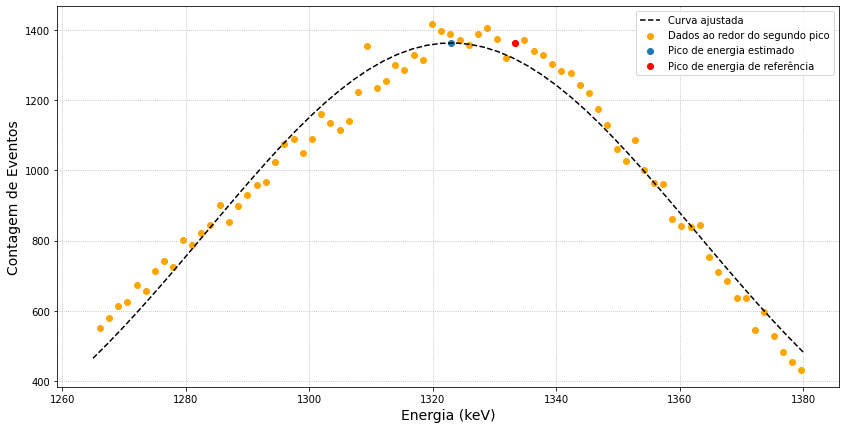

In [39]:
fig = plt.subplots(figsize=(14,7))
x2_co = np.linspace(1265, 1380)
plt.plot(x2_co, Gauss2Co60(x2_co, *popt2Co60), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(dataCo60_peak_2['Energy'], dataCo60_peak_2['Counts'], c='orange', label='Dados ao redor do segundo pico')
plt.scatter(popt2Co60[1],popt2Co60[0], label='Pico de energia estimado')
plt.scatter(1333.387909, 1363, c='r', label='Pico de energia de referência')
plt.xlabel('Energia (keV)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
plt.legend(fontsize='10')
plt.grid(linestyle='dotted')

In [73]:
print(error2Co60[1]/popt2Co60[1])

0.0002613423675923753


In [74]:
print(error1Co60[1]/popt1Co60[1])

0.00023447481592890764
